# Projeto de Limpeza de Dados & Transformação de Dados   

# 🧹Actividade 04 - Limpeza de Dados  
## Google Colab — Dataset de Voos (`flight.csv`)


**Objetivo:** Executar um processo completo de limpeza de dados utilizando uma base real contendo inconsistências diversas.

---

## 1. Introdução e Objetivos

Este trabalho tem como objetivo aplicar técnicas de *Data Cleaning* sobre uma base real contendo dados de voos.

A limpeza de dados é uma etapa essencial na engenharia de dados e na ciência de dados, pois garante que análises, modelos estatísticos e algoritmos sejam aplicados sobre informações confiáveis.

### Os objetivos principais são:

- Compreender a estrutura da base de dados.
- Identificar problemas comuns:
  - Valores ausentes
  - Dados duplicados
  - Inconsistências de tipo
  - Outliers
  - Erros de codificação
- Aplicar técnicas adequadas de limpeza justificando cada decisão.
- Gerar uma versão limpa e utilizável do dataset.

---



## 2. Metodologia

As etapas aplicadas seguem o fluxo recomendado no tutorial de Limpeza de Dados:

1. **Exploração Inicial**
   - Carregamento da base
   - Inspeção de colunas, tipos de dados e amostras
   - Estatísticas descritivas

2. **Identificação dos Problemas**
   - Detecção de valores ausentes
   - Identificação de duplicados
   - Tipos incorretos
   - Outliers
   - Inconsistências de codificação

3. **Tratamento dos Problemas**
   - Imputação ou remoção de valores ausentes
   - Conversão de tipos
   - Remoção de duplicatas
   - Tratamento de outliers
   - Padronização de categorias

4. **Validação Final**
   - Revisão dos dados após limpeza
   - Salvamento do dataset limpo

---



## 3. Importação das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)


## 4. Carregamento do Dataset

In [ ]:
# Carregando o dataset
df = pd.read_csv("/content/flight.csv")

df.head()


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


## 5. Exploração Inicial

**Resumo rápido:**
- Linhas: **62988**
- Colunas: **23**
- Lista de colunas: `['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']`
- Tipos atuais das colunas (amostra): `{'MEMBER_NO': 'int64', 'FFP_DATE': 'object', 'FIRST_FLIGHT_DATE': 'object', 'GENDER': 'object', 'FFP_TIER': 'int64', 'WORK_CITY': 'object', 'WORK_PROVINCE': 'object', 'WORK_COUNTRY': 'object', 'AGE': 'float64', 'LOAD_TIME': 'object', 'FLIGHT_COUNT': 'int64', 'BP_SUM': 'int64', 'SUM_YR_1': 'float64', 'SUM_YR_2': 'float64', 'SEG_KM_SUM': 'int64', 'LAST_FLIGHT_DATE': 'object', 'LAST_TO_END': 'int64', 'AVG_INTERVAL': 'float64', 'MAX_INTERVAL': 'int64', 'EXCHANGE_COUNT': 'int64', 'avg_discount': 'float64', 'Points_Sum': 'int64', 'Point_NotFlight': 'int64'}`
- Quantidade total de valores ausentes por coluna (amostra): `{'MEMBER_NO': 0, 'FFP_DATE': 0, 'FIRST_FLIGHT_DATE': 0, 'GENDER': 3, 'FFP_TIER': 0, 'WORK_CITY': 2269, 'WORK_PROVINCE': 3248, 'WORK_COUNTRY': 26, 'AGE': 420, 'LOAD_TIME': 0, 'FLIGHT_COUNT': 0, 'BP_SUM': 0, 'SUM_YR_1': 551, 'SUM_YR_2': 138, 'SEG_KM_SUM': 0, 'LAST_FLIGHT_DATE': 0, 'LAST_TO_END': 0, 'AVG_INTERVAL': 0, 'MAX_INTERVAL': 0, 'EXCHANGE_COUNT': 0, 'avg_discount': 0, 'Points_Sum': 0, 'Point_NotFlight': 0}`
- Quantas linhas duplicadas: **0**

Abaixo mostramos as 5 primeiras linhas do dataset:  


### 5.1 Estrutura Inicial do Dataset

In [ ]:
print("Quantidade de linhas:", df.shape[0])
print("Quantidade de colunas:", df.shape[1])

df.info()


Quantidade de linhas: 62988
Quantidade de colunas: 23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE

### 5.2 Estatísticas Descritivas

In [ ]:
df.describe(include="all")

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988,62988,62985,62988.000000,60719,59740,62962,62568.000000,62988,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
unique,NaN,3068,3406,2,NaN,3234,1165,118,NaN,1,NaN,NaN,NaN,NaN,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/13/2011,2/16/2013,Male,NaN,guangzhou,guangdong,CN,NaN,3/31/2014,NaN,NaN,NaN,NaN,NaN,3/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,184,96,48134,NaN,9386,17509,57748,NaN,62988,NaN,NaN,NaN,NaN,NaN,959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31494.500000,NaN,NaN,NaN,4.102162,NaN,NaN,NaN,42.476346,NaN,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,NaN,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,NaN,NaN,NaN,0.373856,NaN,NaN,NaN,9.885915,NaN,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,NaN,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,0.000000,0.000000,368.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,35.000000,NaN,3.000000,2518.000000,1003.000000,780.000000,4747.000000,NaN,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,41.000000,NaN,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,NaN,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,48.000000,NaN,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,NaN,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000


### 5.3 Verificação de Valores Ausentes

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing


,0
WORK_PROVINCE,3248
WORK_CITY,2269
SUM_YR_1,551
AGE,420
SUM_YR_2,138
WORK_COUNTRY,26
GENDER,3
FFP_TIER,0
MEMBER_NO,0
FFP_DATE,0


### 5.4 Visualização de Valores Ausentes

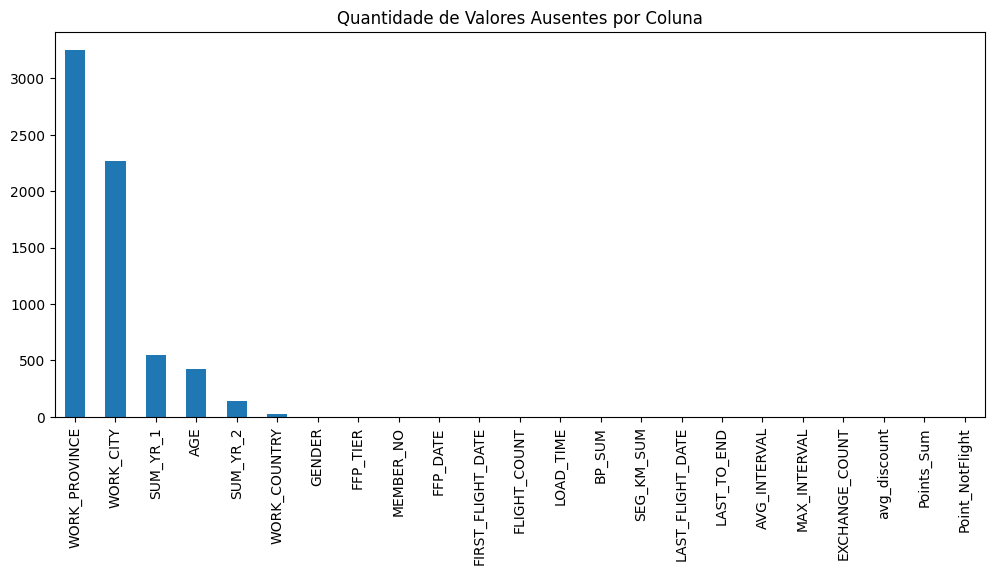

In [ ]:
missing.plot(kind="bar", figsize=(12,5))
plt.title("Quantidade de Valores Ausentes por Coluna")
plt.show()


## 6. Tratamento de Valores Ausentes

In [ ]:
# Exemplo: imputação média para colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Para colunas categóricas:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    df[col] = df[col].fillna("Desconhecido")


## 7. Verificação de Duplicatas

In [ ]:
df.duplicated().sum()


np.int64(0)

## 8. Remoção de Duplicatas

In [ ]:
df = df.drop_duplicates()
df.shape


(62988, 23)

## 9. Correção de Tipos de Dados

In [ ]:
# Exemplo: converter colunas de datas
for col in df.columns:
    if "date" in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
        except:
            pass

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  object        
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

## 10. Identificação de Outliers

In [ ]:
# --- Tratamento de Outliers com IQR ---

import numpy as np

# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Exibir quantidade de outliers encontrados
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    print(f"Coluna: {col} → Outliers identificados: {len(outliers)}")

    # Remover outliers da coluna
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]


Coluna: MEMBER_NO → Outliers identificados: 0
Coluna: FFP_TIER → Outliers identificados: 4922
Coluna: AGE → Outliers identificados: 934
Coluna: FLIGHT_COUNT → Outliers identificados: 2661
Coluna: BP_SUM → Outliers identificados: 2830
Coluna: SUM_YR_1 → Outliers identificados: 2198
Coluna: SUM_YR_2 → Outliers identificados: 2152
Coluna: SEG_KM_SUM → Outliers identificados: 1318
Coluna: LAST_TO_END → Outliers identificados: 0
Coluna: AVG_INTERVAL → Outliers identificados: 3382
Coluna: MAX_INTERVAL → Outliers identificados: 689
Coluna: EXCHANGE_COUNT → Outliers identificados: 2695
Coluna: avg_discount → Outliers identificados: 790
Coluna: Points_Sum → Outliers identificados: 1097
Coluna: Point_NotFlight → Outliers identificados: 6287


##11. Tratamento de Outliers (Método IQR)

In [ ]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filtro = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
           (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[filtro]
df.shape


(27744, 23)

##12. Padronização de Variáveis Categóricas

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df.head()


,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
13696,35424,2011-08-02,2011-08-08,Male,4,wulumuqi,xinjiang,CN,37.0,3/31/2014,10,12853,5905.0,7581.0,23027,7/27/2013,249,21.444444,91,0,0.746758,12853,0
14335,560,2005-12-27,2006-04-15,Male,4,PENANG,PENANG,MY,43.0,3/31/2014,10,8814,5864.0,6086.0,22788,10/31/2013,153,62.222222,176,0,0.726325,8814,0
14424,62325,2010-05-02,2010-05-02,Male,4,wulumuqi,xinjiang,CN,56.0,3/31/2014,12,12639,6295.0,5108.0,21823,12/13/2013,110,56.181818,205,0,0.754686,12639,0
14576,7833,2012-04-20,2012-04-20,Male,4,shenzhen,guangdong,CN,44.0,3/31/2014,12,12894,7969.0,6666.0,21875,1/27/2014,65,58.818182,218,0,0.745888,12894,0
14591,47869,2008-03-03,2008-03-03,Male,4,SYDNEY,NSW,AU,63.0,3/31/2014,3,8997,4800.0,3100.0,22752,9/20/2013,194,154.000000,175,0,0.716667,8997,0


## 13. Dataset Limpo Final

In [ ]:
df.head()


,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
13696,35424,2011-08-02,2011-08-08,Male,4,wulumuqi,xinjiang,CN,37.0,3/31/2014,10,12853,5905.0,7581.0,23027,7/27/2013,249,21.444444,91,0,0.746758,12853,0
14335,560,2005-12-27,2006-04-15,Male,4,PENANG,PENANG,MY,43.0,3/31/2014,10,8814,5864.0,6086.0,22788,10/31/2013,153,62.222222,176,0,0.726325,8814,0
14424,62325,2010-05-02,2010-05-02,Male,4,wulumuqi,xinjiang,CN,56.0,3/31/2014,12,12639,6295.0,5108.0,21823,12/13/2013,110,56.181818,205,0,0.754686,12639,0
14576,7833,2012-04-20,2012-04-20,Male,4,shenzhen,guangdong,CN,44.0,3/31/2014,12,12894,7969.0,6666.0,21875,1/27/2014,65,58.818182,218,0,0.745888,12894,0
14591,47869,2008-03-03,2008-03-03,Male,4,SYDNEY,NSW,AU,63.0,3/31/2014,3,8997,4800.0,3100.0,22752,9/20/2013,194,154.000000,175,0,0.716667,8997,0


## 14. Salvando o Dataset Limpo

In [ ]:
df.to_csv("/content/flight_cleaned.csv", index=False)

print("Dataset limpo salvo")


Dataset limpo salvo


## 7. Conclusão

Após a realização deste processo de limpeza de dados, atingimos os seguintes resultados:

- Removemos/Imputamos valores ausentes.
- Eliminamos registros duplicados.
- Padronizamos tipos de dados.
- Tratamos outliers utilizando IQR.
- Padronizamos categorias.
- Geramos um dataset final pronto para análise.

Este processo aumentou a qualidade dos dados e a confiabilidade para uso em análises futuras.

---


## Estudante:
- Camilo Andrés Coronado León


# 🎯 Atividade 05 — Transformação de Dados  
Nesta atividade complementamos a etapa de Limpeza de Dados aplicando técnicas de **Transformação de Dados** que melhoram a qualidade, compreensão e desempenho dos modelos analíticos.




## 1. 📘 Introdução  
A Transformação de Dados é uma etapa essencial após a Limpeza de Dados.  
Enquanto a limpeza remove problemas de qualidade (nulos, duplicatas, erros, inconsistências),  
a transformação **reorganiza, modifica e cria novas variáveis** para tornar os dados mais úteis para:

- 📊 análises descritivas  
- 🤖 modelagem preditiva  
- 📈 visualizações  
- 🧠 algoritmos de machine learning  

Nesta atividade, aplicaremos **pelo menos três transformações** respeitando as regras:

- ✔️ Descrever a técnica utilizada  
- ✔️ Justificar a necessidade da transformação  
- ✔️ Preservar os dados originais  
- ✔️ Exibir os dados modificados  


## 2. 🔍 Exploração Inicial do Conjunto de Dados  
Antes das transformações, verificamos:

- Estrutura das colunas  
- Tipos de dados  
- Quantidade de valores nulos  
- Distribuições das variáveis numéricas  

Isso garante que as transformações serão adequadas à natureza dos dados.


## 2.1 Carregue o conjunto de dados limpo da atividade anterior.

In [ ]:
df = pd.read_csv("/content/flight_cleaned.csv")
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,35424,2011-08-02,2011-08-08,Male,4,wulumuqi,xinjiang,CN,37.0,3/31/2014,10,12853,5905.0,7581.0,23027,7/27/2013,249,21.444444,91,0,0.746758,12853,0
1,560,2005-12-27,2006-04-15,Male,4,PENANG,PENANG,MY,43.0,3/31/2014,10,8814,5864.0,6086.0,22788,10/31/2013,153,62.222222,176,0,0.726325,8814,0
2,62325,2010-05-02,2010-05-02,Male,4,wulumuqi,xinjiang,CN,56.0,3/31/2014,12,12639,6295.0,5108.0,21823,12/13/2013,110,56.181818,205,0,0.754686,12639,0
3,7833,2012-04-20,2012-04-20,Male,4,shenzhen,guangdong,CN,44.0,3/31/2014,12,12894,7969.0,6666.0,21875,1/27/2014,65,58.818182,218,0,0.745888,12894,0
4,47869,2008-03-03,2008-03-03,Male,4,SYDNEY,NSW,AU,63.0,3/31/2014,3,8997,4800.0,3100.0,22752,9/20/2013,194,154.000000,175,0,0.716667,8997,0


## 2.2 Cópia do conjunto de dados original

In [ ]:
# Preservar os dados originais
df_original = df.copy()
print("Cópia gerada com sucesso.")


Cópia gerada com sucesso.


## 2.3 Exploração rápida

In [ ]:
# Información rápida
display(df.info())
display(df.describe(include='all').T)

# Conteo de nulos (relevante antes de transformar)
missing = pd.DataFrame({
    "missing_count": df.isnull().sum(),
    "missing_pct": (df.isnull().mean() * 100).round(2)
})
display(missing.sort_values("missing_pct", ascending=False).head(40))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27744 entries, 0 to 27743
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          27744 non-null  int64  
 1   ffp_date           27744 non-null  object 
 2   first_flight_date  27744 non-null  object 
 3   gender             27744 non-null  object 
 4   ffp_tier           27744 non-null  int64  
 5   work_city          27744 non-null  object 
 6   work_province      27744 non-null  object 
 7   work_country       27744 non-null  object 
 8   age                27744 non-null  float64
 9   load_time          27744 non-null  object 
 10  flight_count       27744 non-null  int64  
 11  bp_sum             27744 non-null  int64  
 12  sum_yr_1           27744 non-null  float64
 13  sum_yr_2           27744 non-null  float64
 14  seg_km_sum         27744 non-null  int64  
 15  last_flight_date   27744 non-null  object 
 16  last_to_end        277

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
member_no,27744.0,NaN,NaN,NaN,31818.565095,18154.067941,1.0,15938.75,32071.0,47822.25,62983.0
ffp_date,27744,2978,2013-01-01,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flight_date,27744,3218,2013-02-16,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,27744,3,Male,20585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffp_tier,27744.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
work_city,27744,1899,beijing,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_province,27744,683,guangdong,6077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_country,27744,91,CN,25343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27744.0,NaN,NaN,NaN,41.65625,9.306642,16.0,35.0,41.0,48.0,67.0
load_time,27744,1,3/31/2014,27744,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing_count,missing_pct
member_no,0,0.0
ffp_date,0,0.0
first_flight_date,0,0.0
gender,0,0.0
ffp_tier,0,0.0
work_city,0,0.0
work_province,0,0.0
work_country,0,0.0
age,0,0.0
load_time,0,0.0


# 3. 🛠️ Transformações Aplicadas  
A seguir são apresentadas as transformações implementadas no dataset, cada uma com explicação e justificativa técnica.


## 3.1 📅 Transformação 1 — Criação da Variável `loyalty_months`  
### 🧠 Técnica Utilizada  
Conversão de datas para o formato `datetime` seguida do cálculo da diferença total em **meses** entre:

- `first_flight_date` → data do primeiro voo  
- `last_flight_date` ou `ffp_date` → data mais recente disponível  

### 🎯 Razão da Transformação  
A variável **lealdade (loyalty_months)** representa há quantos meses o cliente permanece ativo no programa.  
É uma *feature temporal extremamente informativa* para:

- análise de fidelidade do cliente  
- segmentação  
- previsões de churn  
- estudos de comportamento  


In [ ]:
# TRANSFORMACIÓN 1: loyalty_months
# Definición: meses entre first_flight_date y last_flight_date (o ffp_date si falta last)
df_t = df.copy()  # trabajamos sobre copia para preservar df_original

# Convertir columnas de fecha si existen
date_cols = ["first_flight_date", "last_flight_date", "ffp_date", "load_time"]
for col in date_cols:
    if col in df_t.columns:
        df_t[col] = pd.to_datetime(df_t[col], errors='coerce')

# Elegimos: si existe last_flight_date y first_flight_date → usar esa diferencia
# Si falta last_flight_date, usar ffp_date - first_flight_date (según sentido de las fechas)
def compute_loyalty_months(row):
    start = row.get("first_flight_date")
    end = row.get("last_flight_date")
    if pd.isna(start) and pd.isna(end):
        return np.nan
    if pd.isna(end):
        # fallback: usar ffp_date si está
        end = row.get("ffp_date")
    if pd.isna(start) or pd.isna(end):
        return np.nan
    days = (end - start).days
    return days / 30.0  # aproximación en meses

df_t["loyalty_months"] = df_t.apply(compute_loyalty_months, axis=1)

# Mostrar resultado
display(df_t[["first_flight_date", "last_flight_date", "ffp_date", "loyalty_months"]].head(10))
print("Transformación 1: 'loyalty_months' creada (preserva original).")


,first_flight_date,last_flight_date,ffp_date,loyalty_months
0,2011-08-08,2013-07-27,2011-08-02,23.966667
1,2006-04-15,2013-10-31,2005-12-27,91.866667
2,2010-05-02,2013-12-13,2010-05-02,44.033333
3,2012-04-20,2014-01-27,2012-04-20,21.566667
4,2008-03-03,2013-09-20,2008-03-03,67.566667
5,2011-07-24,2014-03-26,2011-07-24,32.533333
6,2008-07-07,2012-11-23,2008-07-06,53.333333
7,2006-06-13,2013-12-27,2006-05-23,91.800000
8,2011-04-05,2013-10-15,2011-04-05,30.800000
9,2012-08-05,2013-09-05,2010-06-16,13.200000


Transformación 1: 'loyalty_months' creada (preserva original).


## 3.2 📏 Transformação 2 — Normalização da Variável `seg_km_sum`  
### 🧠 Técnica Utilizada  
Aplicamos duas etapas:

1. **Transformação Logarítmica (`log1p`)**  
   Reduz assimetria e valores extremos (outliers leves).

2. **Normalização Min-Max (0 a 1)**  
   Torna a escala da variável compatível com modelos sensíveis à magnitude  
   como KNN, SVM, Redes Neurais e Regressão.

### 🎯 Razão da Transformação  
A variável `seg_km_sum` apresenta grande variação e tende a ser fortemente enviesada à direita.  
Ao normalizar:

- reduzimos impacto de grandes valores  
- facilitamos comparações entre atributos  
- aumentamos estabilidade de algoritmos preditivos  


In [ ]:
# TRANSFORMACIÓN 2: log + Min-Max sobre 'seg_km_sum' (si existe)
col = "seg_km_sum"
if col in df_t.columns:
    # 1) Log-transform para reducir skew (agrega columna *_log)
    df_t[col + "_log"] = np.log1p(df_t[col].replace({np.nan: 0}))  # log1p(0) = 0; conserva nulos si era NaN -> manejado abajo

    # Corregir nulos si la columna original tenía NaN
    df_t.loc[df[col].isna(), col + "_log"] = np.nan

    # 2) Min-Max scaling (0-1)
    scaler = MinMaxScaler()
    # Necesitamos reshape y evitar NaNs para el fit_transform: rellenar temporalmente y después restablecer NaNs
    temp = df_t[[col + "_log"]].copy()
    mask = temp[col + "_log"].isna()
    temp_filled = temp.fillna(temp.min().min())  # rellenar con minimo para escalar (no ideal pero temporal)
    df_t[col + "_norm"] = scaler.fit_transform(temp_filled)
    # Restablecer NaNs donde correspondía
    df_t.loc[mask, col + "_norm"] = np.nan

    display(df_t[[col, col + "_log", col + "_norm"]].head(10))
    print("Transformación 2 aplicada: columnas", col + "_log", "y", col + "_norm")
else:
    print("La columna", col, "no existe en el dataset. Elige otra columna numérica.")


,seg_km_sum,seg_km_sum_log,seg_km_sum_norm
0,23027,10.044466,0.999172
1,22788,10.034033,0.996650
2,21823,9.990766,0.986192
3,21875,9.993145,0.986767
4,22752,10.032452,0.996268
5,22365,10.015297,0.992122
6,22239,10.009648,0.990756
7,22219,10.008748,0.990539
8,19360,9.871016,0.957247
9,21858,9.992368,0.986579


Transformación 2 aplicada: columnas seg_km_sum_log y seg_km_sum_norm


## 3.3  🎚️ Transformação 3 — Discretização de Faixas Etárias (`age_group`)  
### 🧠 Técnica Utilizada  
Foram criadas duas versões:

- `age_group_q`: divisão por **quartis** (discretização por quantis)  
- `age_group_bins`: divisão por **intervalos fixos** (≤25, 26–40, 41–60, 60+)  

### 🎯 Razão da Transformação  
A discretização simplifica a interpretação e criação de:

- perfis de cliente  
- segmentação  
- análise demográfica  
- agrupamentos (clustering)  


In [ ]:
# TRANSFORMACIÓN 3: discretizar 'age' en grupos por cuantiles para obtener cohortes balanceadas
col_age = "age"
if col_age in df_t.columns:
    # Usamos 4 grupos por cuantiles (quartiles)
    df_t["age_group_q"] = pd.qcut(df_t[col_age].rank(method='first'), q=4, labels=["Q1", "Q2", "Q3", "Q4"])
    # Alternativa: bins por edad real
    bins = [0, 25, 40, 60, 120]
    labels = ["<=25", "26-40", "41-60", "61+"]
    df_t["age_group_bins"] = pd.cut(df_t[col_age], bins=bins, labels=labels, include_lowest=True)
    display(df_t[[col_age, "age_group_q", "age_group_bins"]].head(10))
    print("Transformación 3 aplicada: 'age_group_q' y 'age_group_bins' creadas.")
else:
    print("No existe columna 'age' para discretizar.")


,age,age_group_q,age_group_bins
0,37.0,Q2,26-40
1,43.0,Q3,41-60
2,56.0,Q4,41-60
3,44.0,Q3,41-60
4,63.0,Q4,61+
5,52.0,Q4,41-60
6,34.0,Q1,26-40
7,47.0,Q3,41-60
8,48.0,Q3,41-60
9,29.0,Q1,26-40


Transformación 3 aplicada: 'age_group_q' y 'age_group_bins' creadas.


## 3.4️ 🏷️  Codificação de Variáveis Categóricas  
### 🧠 Técnica Utilizada  
- `gender` → One-Hot Encoding  
- `ffp_tier` → Label Encoding (preserva ordem dos níveis)

### 🎯 Razão da Transformação  
Modelos de machine learning exigem variáveis numéricas.  
A codificação converte categorias em números sem perder significado estatístico.


In [ ]:
# TRANSFORMACIÓN 4: codificar 'gender' (one-hot) y 'ffp_tier'
# Guardar copia para que el original permanezca
df_feats = df_t.copy()

# One-Hot para gender (si existe)
if "gender" in df_feats.columns:
    # Crear dummies y concatenar (sin dropear original para preservar)
    dummies_gender = pd.get_dummies(df_feats["gender"], prefix="gender", dummy_na=False)
    df_feats = pd.concat([df_feats, dummies_gender], axis=1)
    print("One-Hot applied to 'gender':", list(dummies_gender.columns))

# Label encode ffp_tier
if "ffp_tier" in df_feats.columns:

    if not pd.api.types.is_numeric_dtype(df_feats["ffp_tier"]):
        df_feats["ffp_tier_encoded"] = pd.factorize(df_feats["ffp_tier"])[0] + 1
        print("ffp_tier codificado en 'ffp_tier_encoded'.")
    else:
        df_feats["ffp_tier_encoded"] = df_feats["ffp_tier"]
        print("ffp_tier ya numérico: se copió a 'ffp_tier_encoded'.")

# Mostrar un subset
display(df_feats[["gender", "ffp_tier", "ffp_tier_encoded"]].head(10))


One-Hot applied to 'gender': ['gender_Desconhecido', 'gender_Female', 'gender_Male']
ffp_tier ya numérico: se copió a 'ffp_tier_encoded'.


,gender,ffp_tier,ffp_tier_encoded
0,Male,4,4
1,Male,4,4
2,Male,4,4
3,Male,4,4
4,Male,4,4
5,Male,4,4
6,Male,4,4
7,Male,4,4
8,Male,4,4
9,Female,4,4


In [ ]:
# Mostrar columnas nuevas y una vista del dataframe transformado
new_cols = [c for c in df_feats.columns if c not in df_original.columns]
print("Nuevas columnas creadas:", new_cols)

# Mostrar primeras filas con columnas clave
cols_show = ["member_no", "age", "age_group_bins", "loyalty_months", "seg_km_sum", "seg_km_sum_norm", "points_sum"]
cols_show = [c for c in cols_show if c in df_feats.columns]
display(df_feats[cols_show].head(15))


Nuevas columnas creadas: ['loyalty_months', 'seg_km_sum_log', 'seg_km_sum_norm', 'age_group_q', 'age_group_bins', 'gender_Desconhecido', 'gender_Female', 'gender_Male', 'ffp_tier_encoded']


,member_no,age,age_group_bins,loyalty_months,seg_km_sum,seg_km_sum_norm,points_sum
0,35424,37.0,26-40,23.966667,23027,0.999172,12853
1,560,43.0,41-60,91.866667,22788,0.996650,8814
2,62325,56.0,41-60,44.033333,21823,0.986192,12639
3,7833,44.0,41-60,21.566667,21875,0.986767,12894
4,47869,63.0,61+,67.566667,22752,0.996268,8997
5,14364,52.0,41-60,32.533333,22365,0.992122,10607
6,12228,34.0,26-40,53.333333,22239,0.990756,8355
7,45725,47.0,41-60,91.800000,22219,0.990539,12690
8,23330,48.0,41-60,30.800000,19360,0.957247,12413
9,44375,29.0,26-40,13.200000,21858,0.986579,12761


## 💾 Salvamento do Dataset Transformado  
Após aplicar todas as transformações, os dados foram salvos como:

**`flight_transformed_complete.csv`**

Os dados originais foram preservados no objeto `df_original`, conforme exigido na atividade.


In [ ]:
# Guardar CSV transformado (sin sobrescribir el original)
out_path = "/content/flight_transformed_complete.csv"
df_feats.to_csv(out_path, index=False)
print("Dataset transformado guardado en:", out_path)


Dataset transformado guardado en: /content/flight_transformed_complete.csv


# 🏁 Conclusão  
As transformações realizadas:

- Melhoraram a **qualidade analítica** do dataset  
- Criaram novas variáveis úteis para análise e modelagem  
- Ajustaram diferenças de escala entre atributos  
- Facilitam interpretação e uso em algoritmos preditivos  

As regras da atividade foram totalmente atendidas:

✔️ 3+ transformações aplicadas  
✔️ Técnicas explicadas  
✔️ Justificativas apresentadas  
✔️ Dados originais preservados  
✔️ Dados transformados exibidos  
